In [1]:
import torch

In [2]:
words = open("names.txt").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [48]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [49]:
chars = sorted(list(set("".join(words))))

In [50]:
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [51]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [52]:
itos = {i: s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

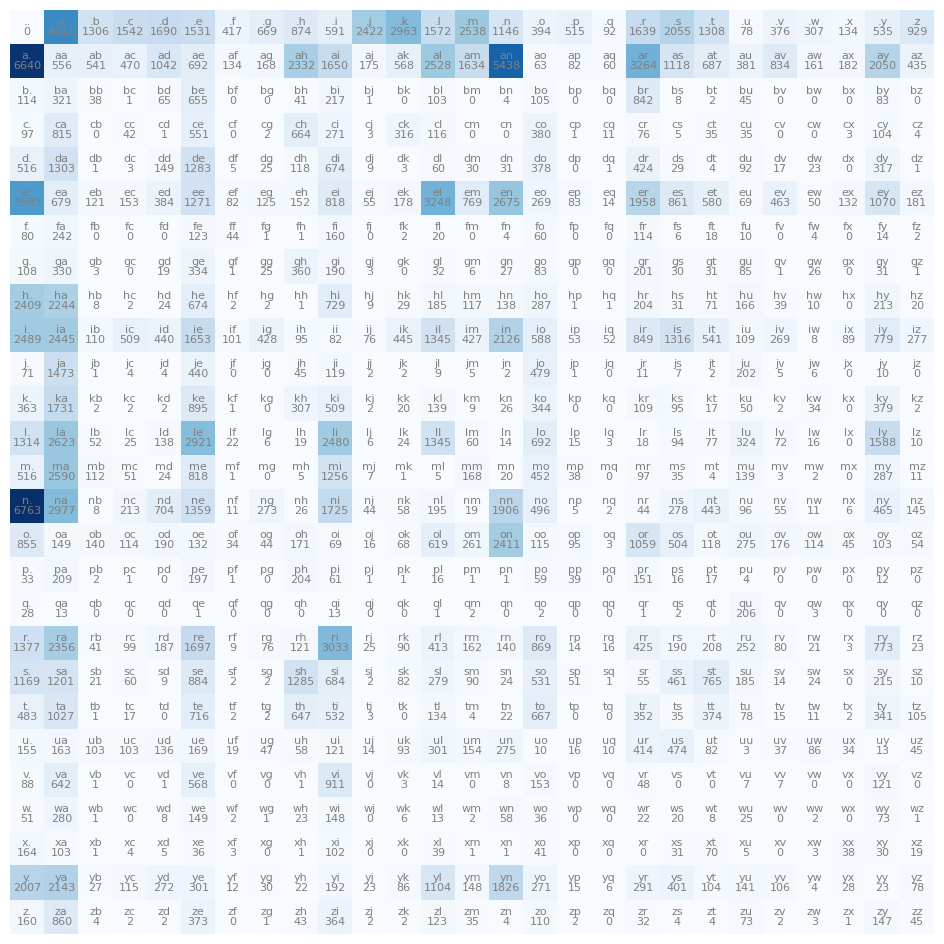

In [850]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(12, 12))
plt.imshow(N, cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray", fontsize=8)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray", fontsize=8)
plt.axis("off")
plt.show()

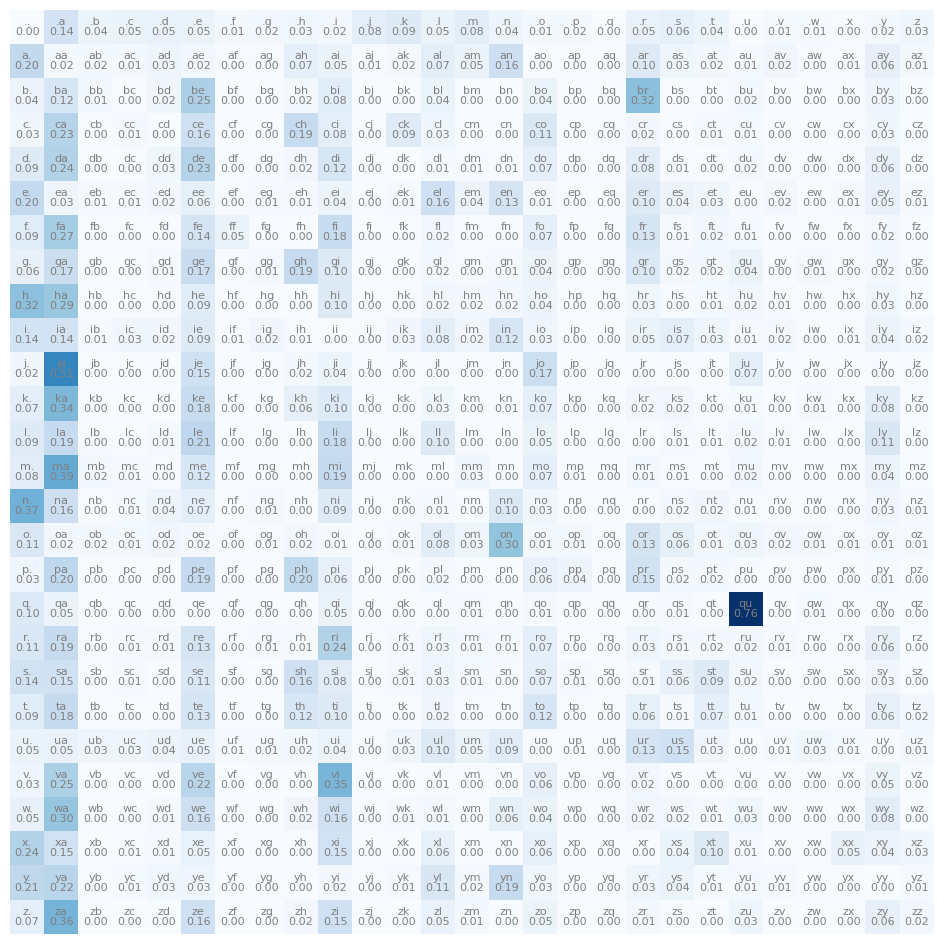

In [854]:
N_ = N.detach()
N_ = (N_ / N_.sum(1, keepdim=True)).numpy()
plt.figure(figsize=(12, 12))
plt.imshow(N_, cmap="Blues")
for i in range(N_.shape[0]):
    for j in range(N_.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray", fontsize=8)
        plt.text(
            j, i, f"{N_[i, j]:.2f}", ha="center", va="top", color="gray", fontsize=8
        )
plt.axis("off")
plt.show()

In [160]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [161]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [162]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [163]:
# g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator=g)
# p = p / p.sum()
# p

In [164]:
# torch.multinomial(p, num_samples=20, replacement=True, generator=g)

In [198]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [199]:
P[0].sum()

tensor(1.)

In [200]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.


In [201]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"log_likelihood: {log_likelihood:.4f}")
# Negative log likelihood
nll = -log_likelihood
print(f"nll: {nll:.4f}")
print(f"{nll/n:.4f}")

log_likelihood: -559951.5625
nll: 559951.5625
2.4544


In [202]:
# Create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# Create the model

In [203]:
xs

tensor([ 0,  5, 13, 13,  1])

In [204]:
ys

tensor([ 5, 13, 13,  1,  0])

In [214]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

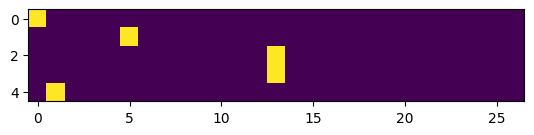

In [215]:
plt.imshow(xenc)

In [320]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.2209,  0.4164,  1.0786,  1.1061,  0.8943,  0.3568,  0.6112,  0.4117,
         -1.2883, -0.6606,  0.4696,  0.0879, -1.4595,  1.2242, -2.0938, -2.7056,
         -2.1657,  0.9445, -2.6354,  1.5307,  1.4394, -0.1753,  0.8996,  0.7921,
         -0.3973,  0.8997, -1.5226],
        [-0.9491,  0.8388,  1.4600, -1.2063, -0.8104, -0.4543, -0.4983, -0.5310,
         -0.3324,  0.4592, -0.0426,  0.9698,  0.7162,  0.6275,  0.4715, -0.8044,
         -2.0535, -1.6264, -1.3796, -1.1117,  0.4011, -1.2722,  0.5010, -2.2871,
         -1.2513, -0.9154, -0.2025],
        [-0.9525,  0.6276,  0.3286, -0.2643, -0.2221,  0.9372,  2.5619,  1.3076,
         -2.2454, -0.0176,  1.5621, -1.2927,  0.4780,  0.2176,  1.0304, -1.1803,
         -0.4756, -0.4011, -0.2654, -2.2108, -0.6820,  0.8943,  1.0521, -0.9799,
         -1.1222,  0.5459, -0.6259],
        [-0.9525,  0.6276,  0.3286, -0.2643, -0.2221,  0.9372,  2.5619,  1.3076,
         -2.2454, -0.0176,  1.5621, -1.2927,  0.4780,  0.2176,  1.0304, -1.1803

In [330]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), requires_grad=True, generator=g)

In [788]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W  # predict log counts
counts = logits.exp()  # counts of each bigram
probs = counts / counts.sum(1, keepdim=True)  # probabilities for next character
# Last 2 lines are together called softmax
loss = -probs[torch.arange(5), ys].log().mean()

In [789]:
print(loss.item())

1.942345380783081


In [790]:
W.grad = None  # Set the gradient to zero
loss.backward()

In [791]:
W.data += -0.1 * W.grad

In [809]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print(f"Number of examples: {num}")

# Initialize the model
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), requires_grad=True, generator=g)

Number of examples: 228146


In [840]:
# gradient descent

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data -= 50 * W.grad

2.4553630352020264
2.4553613662719727
2.455359697341919
2.4553580284118652
2.4553563594818115
2.455355405807495
2.4553537368774414
2.4553520679473877
2.455350637435913
2.4553489685058594
2.4553472995758057
2.45534610748291
2.4553444385528564
2.455343008041382
2.4553415775299072
2.4553403854370117
2.4553382396698
2.4553372859954834
2.4553356170654297
2.455333948135376
2.4553325176239014
2.455331325531006
2.455329656600952
2.4553282260894775
2.455326795578003
2.4553253650665283
2.4553239345550537
2.455322504043579
2.4553210735321045
2.455319404602051
2.455317974090576
2.4553165435791016
2.455315113067627
2.4553136825561523
2.4553122520446777
2.4553110599517822
2.4553093910217285
2.455307960510254
2.4553065299987793
2.4553048610687256
2.455303907394409
2.4553022384643555
2.45530104637146
2.4552993774414062
2.4552981853485107
2.455296754837036
2.4552953243255615
2.455293655395508
2.455292224884033
2.4552910327911377
2.455289363861084
2.4552881717681885
2.455286741256714
2.4552855491638184


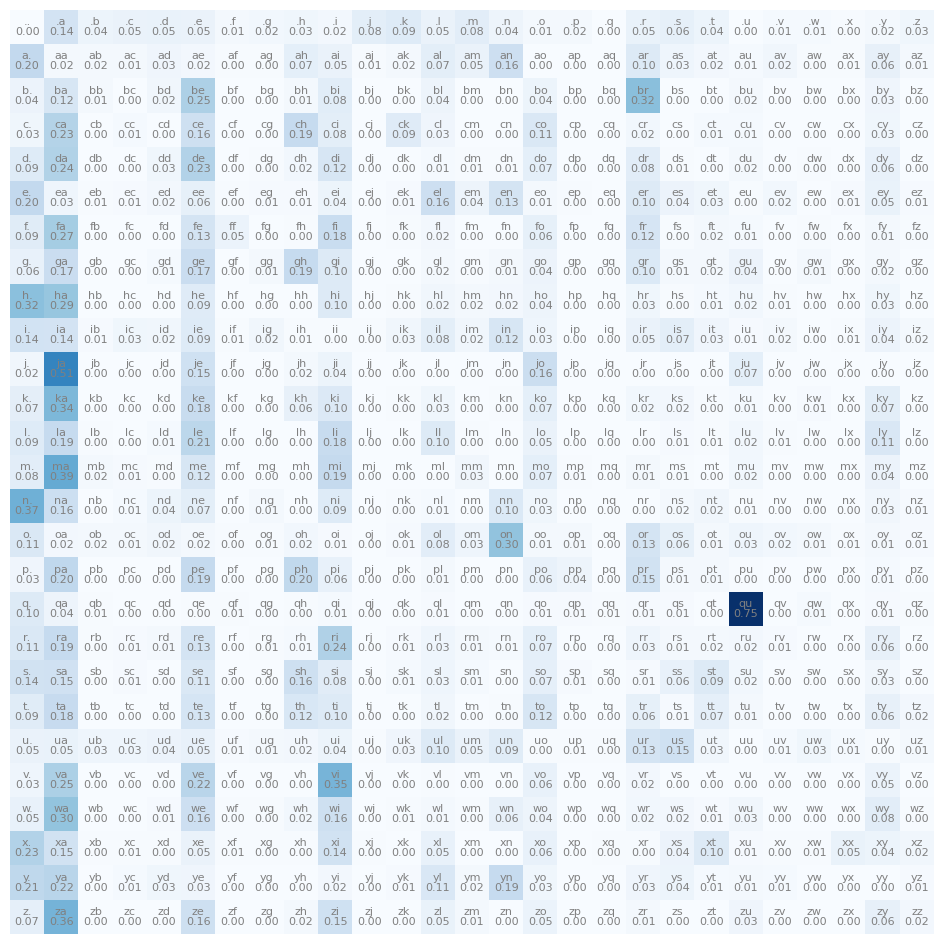

In [847]:
W_ = W.detach().exp()
W_ = W_ / W_.sum(1, keepdim=True)

plt.figure(figsize=(12, 12))
plt.imshow(W_, cmap="Blues")
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray", fontsize=8)
        plt.text(
            j, i, f"{W_[i, j]:.2f}", ha="center", va="top", color="gray", fontsize=8
        )
plt.axis("off")
plt.show()

In [842]:
# finally, sample from the model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # BEFORE
        # p = P[ix]

        # AFTER
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

junide.
janasah.
p.
cony.
a.
